# 3. Visualizing data distributions

**Outlines**

1. Visualize distributions.
2. Understand how different distribution plots are made and their pros and cons.
3. Select an appropriate distribution plot for the situation.
4. Create density plots to compare a few distributions.
5. Create boxplots and violin plot to compare many distributions.

## Visualizing distributions

### Altair

We will use a movie data set.
It is collected from IMDB,
and includes both user ratings as well as movie budgets, runtimes, etc.

In [1]:
import pandas as pd

movies = pd.read_json('data/lec2-movies.json')
movies

id                                              title  runtime  \
0        12                                       Finding Nemo      100   
1        22  Pirates of the Caribbean: The Curse of the Bla...      143   
2        35                                 The Simpsons Movie       87   
3        58         Pirates of the Caribbean: Dead Man's Chest      151   
4        75                                      Mars Attacks!      106   
..      ...                                                ...      ...   
675  374720                                            Dunkirk      107   
676  378236                                    The Emoji Movie       86   
677  381289                                    A Dog's Purpose      100   
678  382322                           Batman: The Killing Joke       72   
679  402298                                             Denial      109   

        budget     revenue       genres  \
0     94000000   940335536  [Animation]   
1    140000000   655011224    [Fantasy]   
2     75000000   527068851  [Animation]   
3    200000000  1065659812    [Fantasy]   
4     70000000   101371017    [Fantasy]   
..         ...         ...          ...   
675  100000000   519876949    [History]   
676   50000000    66913939  [Animation]   
677   22000000   194647323    [Fantasy]   
678    3500000     3775000  [Animation]   
679   10000000     4073489    [History]   

                                      countries  vote_average  vote_loved_it  \
0                    [United States of America]          3.86          0.322   
1                    [United States of America]          3.81          0.320   
2                    [United States of America]          3.44          0.155   
3                    [United States of America]          3.47          0.198   
4                    [United States of America]          2.96          0.086   
..                                          ...           ...            ...   
675  [United Kingdom, United States of America]          4.11          0.465   
676                  [United States of America]          0.63          0.000   
677                  [United States of America]          3.61          0.284   
678                  [United States of America]          2.94          0.057   
679  [United Kingdom, United States of America]          3.62          0.162   

     vote_count  vote_std  
0         33887      0.87  
1         36337      0.91  
2          8621      0.92  
3         15079      0.98  
4         19515      1.10  
..          ...       ...  
675         282      0.78  
676          19      0.23  
677         109      1.17  
678         209      1.02  
679          68      0.82  

[680 rows x 11 columns]

Let's recall how to make a histogram,
using the runtime of the movies.

In [2]:
import altair as alt

# Make sure plots show up in the notes as static images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# This cell is only needed for displaying the plots in Jupyter Book
# since there is not active Python kernel there so 'mimetype' interactive display won't work
# and the fallback image does not active properly for some reason.
alt.renderers.enable('altair_saver', fmts=['vega-lite', 'svg'])

RendererRegistry.enable('altair_saver')

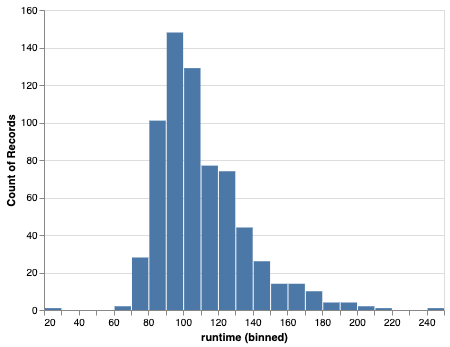

In [4]:
(alt.Chart(movies).mark_bar().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()'))

What if we want to facet the histogram by country?
Since the `'country'` column consists of lists with one or more labels,
we need to unpack these list so that we have one country in each row.
This means that movies that have multiple production countries, 
will be duplicated in the dataframe and counted once per country.
In this case,
this is the most sensible thing to do,
but in general it is good to be careful when doing an operation like this
since it could lead to unwanted replicates
(and we would not want to have duplicated rows 
if we are not faceting or coloring by that variable).

Unpacking a list is done via the [`explode` method of pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html).

In [5]:
boom_countries = movies.explode('countries')
boom_countries

id                                              title  runtime  \
0        12                                       Finding Nemo      100   
1        22  Pirates of the Caribbean: The Curse of the Bla...      143   
2        35                                 The Simpsons Movie       87   
3        58         Pirates of the Caribbean: Dead Man's Chest      151   
4        75                                      Mars Attacks!      106   
..      ...                                                ...      ...   
676  378236                                    The Emoji Movie       86   
677  381289                                    A Dog's Purpose      100   
678  382322                           Batman: The Killing Joke       72   
679  402298                                             Denial      109   
679  402298                                             Denial      109   

        budget     revenue       genres                 countries  \
0     94000000   940335536  [Animation]  United States of America   
1    140000000   655011224    [Fantasy]  United States of America   
2     75000000   527068851  [Animation]  United States of America   
3    200000000  1065659812    [Fantasy]  United States of America   
4     70000000   101371017    [Fantasy]  United States of America   
..         ...         ...          ...                       ...   
676   50000000    66913939  [Animation]  United States of America   
677   22000000   194647323    [Fantasy]  United States of America   
678    3500000     3775000  [Animation]  United States of America   
679   10000000     4073489    [History]            United Kingdom   
679   10000000     4073489    [History]  United States of America   

     vote_average  vote_loved_it  vote_count  vote_std  
0            3.86          0.322       33887      0.87  
1            3.81          0.320       36337      0.91  
2            3.44          0.155        8621      0.92  
3            3.47          0.198       15079      0.98  
4            2.96          0.086       19515      1.10  
..            ...            ...         ...       ...  
676          0.63          0.000          19      0.23  
677          3.61          0.284         109      1.17  
678          2.94          0.057         209      1.02  
679          3.62          0.162          68      0.82  
679          3.62          0.162          68      0.82  

[775 rows x 11 columns]

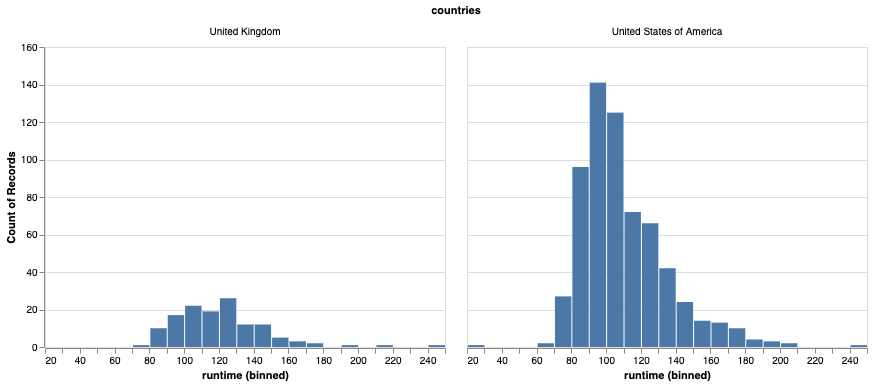

In [6]:
(alt.Chart(boom_countries).mark_bar().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()')
 .facet('countries'))

By default when faceting,
the y-axis is the same for all plots so that they are easy to compare,
but we could also make it independent for each plot.

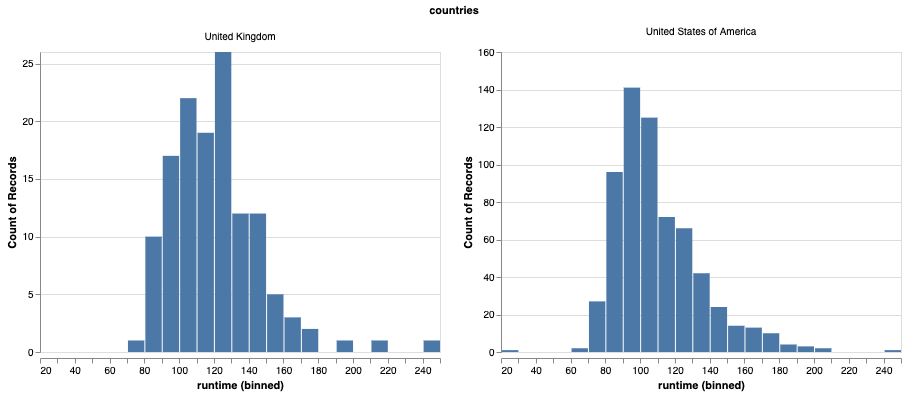

In [7]:
(alt.Chart(boom_countries).mark_bar().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()')
 .facet('countries')
 .resolve_scale(y='independent'))

If we want to color our faceted plots by the movie genre,
we need to explode also the `'genres'` column in the df.

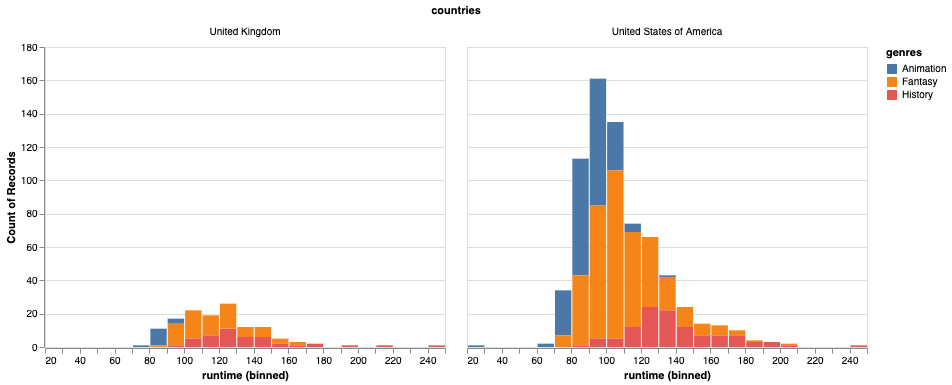

In [8]:
boom_both = boom_countries.explode('genres')
(alt.Chart(boom_both).mark_bar().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='genres')
 .facet('countries'))

We can get a rough indication of the genre differences from this plot,
but as we have mention previously,
it is not ideal to be looking at bars with different baselines.
If we want the bars on the same baseline,
we could set `stack=False` on the y-axis
but it often does not look that great for histograms,
and can make them even harder to read.

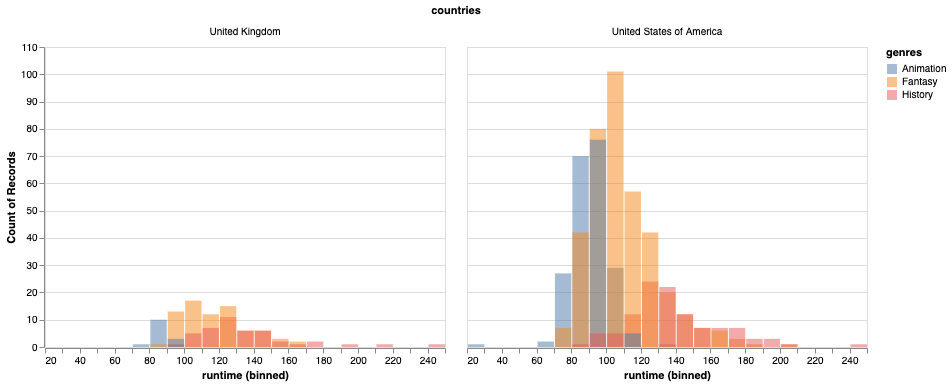

In [9]:
boom_both = boom_countries.explode('genres')
(alt.Chart(boom_both).mark_bar(opacity=0.5).encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=False),
    color='genres')
 .facet('countries'))

#### Histogram line plots

We could draw a line for the histograms,
since this will not stack on top of each other,
but start from the same point of the y-axis.

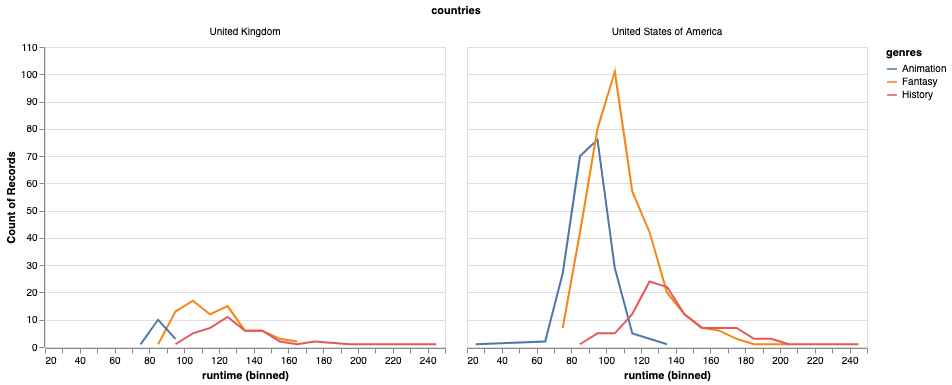

In [10]:
(alt.Chart(boom_both).mark_line().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='genres')
 .facet('countries'))

To make the lines appearance more histogram-like,
we could change the interpolation method.
This refers to how the line behaves between two data points
and the default is to draw a diagonal line between data points
(euclidean distance/linear interpolation).
If we instead use step-wise interpolation ([taxicab geometry/manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)),
it looks more like a histogram.
But please note that I am only showing this for demonstration purposes,
this does not quite behave as a histogram and should not be used as such
as per [this GitHub comment from the Altair author](https://github.com/altair-viz/altair/issues/1701#issuecomment-534398358) (until this issue is fixed).

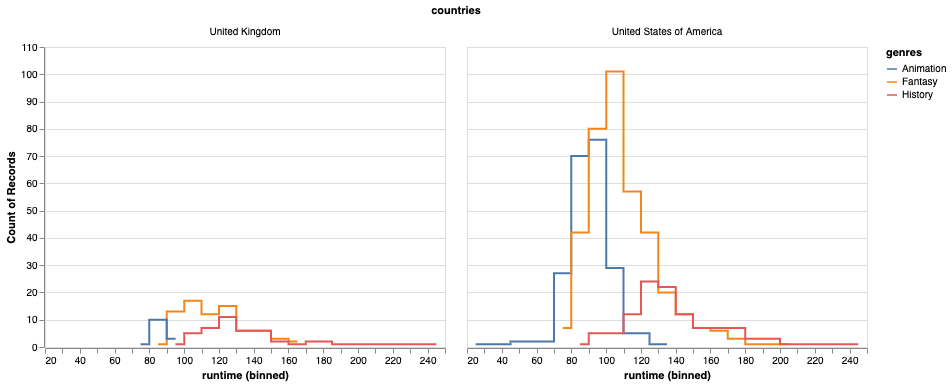

In [11]:
(alt.Chart(boom_both).mark_line(interpolate='step').encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='genres')
 .facet('countries'))

We could also prefer a [monotone cubic interpolation](https://en.wikipedia.org/wiki/Monotone_cubic_interpolation),
which essentially entails rounding the corners
while preserving the one-directional (monotone) properties of a linear interpolation
(i.e. make sure the line does not wiggle up and down between data points,
but proceed gradually from one to the next).

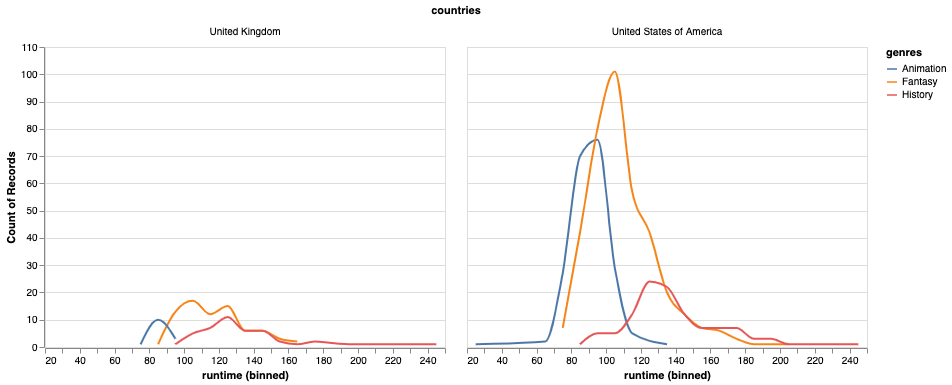

In [12]:
(alt.Chart(boom_both).mark_line(interpolate='monotone').encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='genres')
 .facet('countries'))

While this looks similar to a kernel density estimate (KDE),
it is not the same thing and should not be used as such
(but it is useful for changing the appearance of line plots in general).

#### Density plots

**Another issue with histograms**,
is that where the bin borders are drawn 
can impact how the distribution look
and the conclusions we draw from the plot.
This image depicts histograms of the same data
from popular plotting package.

The distribution looks quite different
depending on the number of bins and their placement.


[Scikit learn's documenation on density plots is great](https://scikit-learn.org/stable/modules/density.html#density-estimation) and includes images comparing with histograms and also visualizing the different kernels that could be used.

To visualize a density plot,
we need to do two things:

1. Calculate the kernel density estimate (the "KDE")
   by adding the individual Gaussian kernels and summing them together.
2. Plot a line or area mark for the newly calculated KDE values.

In Altair,
these operations are done in two explicit steps,
whereas ggplot has a `geom_` that does both in the same step.
Let's start by seeing how density plots are created in Altair.

<div class="alert alert-danger" style="color:black">
    
**Warning**
    
If you get the following error:
    
`AttributeError: 'list' object has no attribute 'get'`
    
when trying tying to run the next cell,
it is likely because your jsonschema package is too new.
Check by running this in the notebook 
    
`import jsonschema; jsonschema.__version__`
    
If it is `>3.2.0`, you need to downgrade with `conda install jsonschema=3.2.0`
and if that does not work also try `pip install jsonschema==3.2.0`.
You might need to restart your JupyterLab server for the changes to take effect.
    
</div>

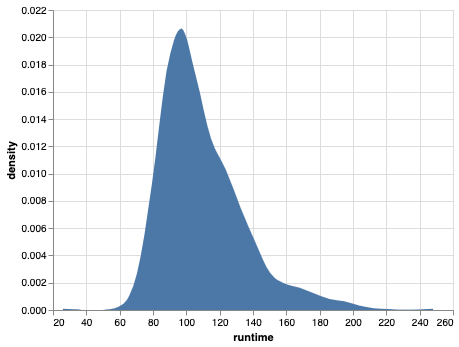

In [13]:
(alt.Chart(movies)
 .transform_density(
    'runtime',
    as_=['runtime', 'density'])  # Give the name "density" the KDE columns we just created
 .mark_area(interpolate='monotone').encode(
    x='runtime',
    y='density:Q')
)

In the above,
we need to use `':Q'` to indicate that the density is numeric 
since it is not part of the dataframe,
so Altair cannot use the pandas data types to figure out that it is numeric.
You can control the width of the kernels via the `bandwidth` parameter,
but the default is a suitable choice in most cases.

If we want to color by a categorical variable,
we need to add an explicit `groupby` 
when calculating the density also,
so that there is one density calculation
per color variable (`genres` in this case).

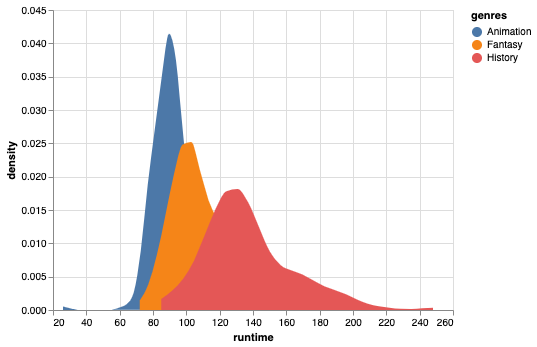

In [14]:
boom_genres = movies.explode('genres')
(alt.Chart(boom_genres)
 .transform_density(
     'runtime',
     groupby=['genres'],
     as_=['runtime', 'density'])
 .mark_area(interpolate='monotone').encode(
     x='runtime',
     y='density:Q',
     color='genres'))

Altair selects a default resolution of the curves between 25 and 200.
If your curves looked jagged, you can manually specify e.g. `steps=200`
inside the density transform,
but in our case the default is good.

Lastly, we could make the histograms slightly transparent so that it is easier to see the overlap.

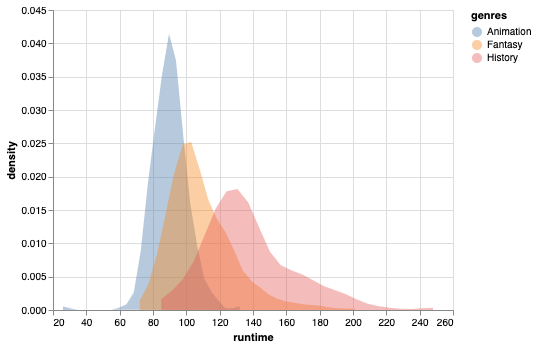

In [15]:
alt.Chart(boom_genres).transform_density(
     'runtime',
     groupby=['genres'],
     as_=['runtime', 'density'],
).mark_area(
     opacity=0.4
 ).encode(
     x='runtime',
     y='density:Q',
     color='genres'
)

If we face these,
you will notice that they look quite different from the faceted histograms.
This is because the density rather than the count is shown by default on the y-axis.
Showing the density means that we can see how the area adds up to one,
but is not really a useful numbers for us to know.

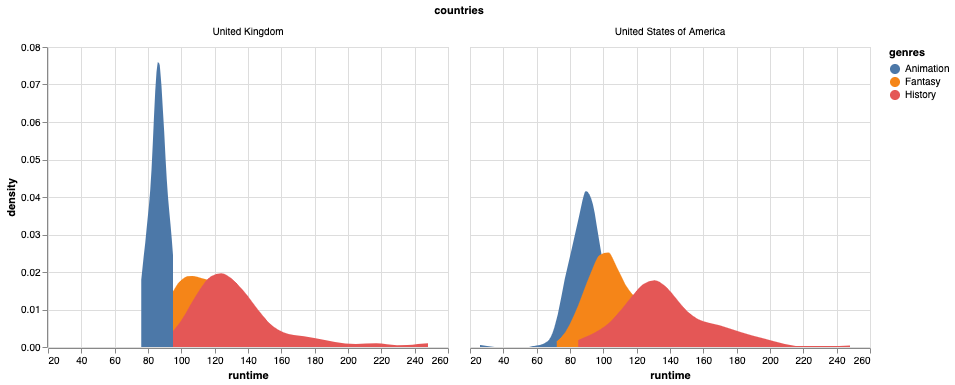

In [16]:
(alt.Chart(boom_both)
 .transform_density(
     'runtime',
     groupby=['genres', 'countries'],
     as_=['runtime', 'density'])
 .mark_area(interpolate='monotone').encode(
     x='runtime',
     y='density:Q',
     color='genres')
 .facet('countries'))

We could instead scale it by the count,
but again this is not that useful,
as it is not as clear how to interpret this,
compared to a histogram with discrete bins and a count in each bin.

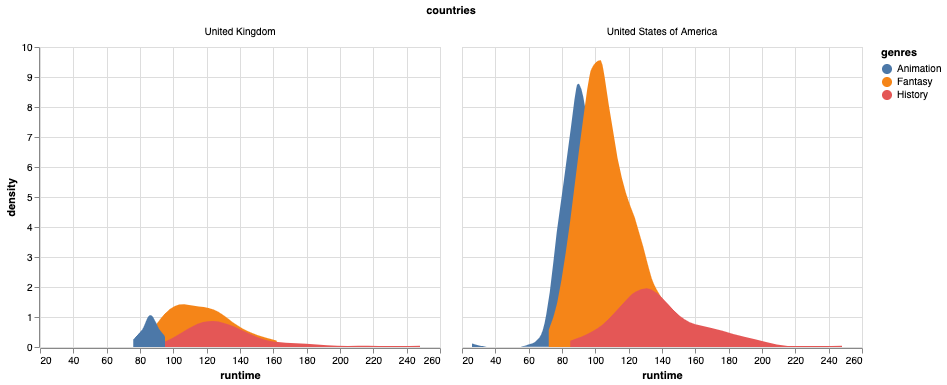

In [17]:
(alt.Chart(boom_both)
 .transform_density(
     'runtime',
     groupby=['genres', 'countries'],
     as_=['runtime', 'density'],
     counts=True,
 )
 .mark_area(interpolate='monotone').encode(
     x='runtime',
     y='density:Q',
     color='genres')
 .facet('countries'))

So in summary for densities,
**the important is the shape for us to see how the values are distributed,**
and possibly the size if you scale them,
but just treat this as a relative indicator versus other densities
rather than relying too much on the exact values on the y-axis.

<br>

<br>

<br>
<br>

#### Using lines instead of areas for densities

Here,
we could also use `row` and `columns` parameters to facet
in order to separate the categorical variables further.
This is especially useful if we would have had a third categorical column,
so I made a true/false column for whether the movie had a high rating or not.
But the the line mark don't work that well with this split.

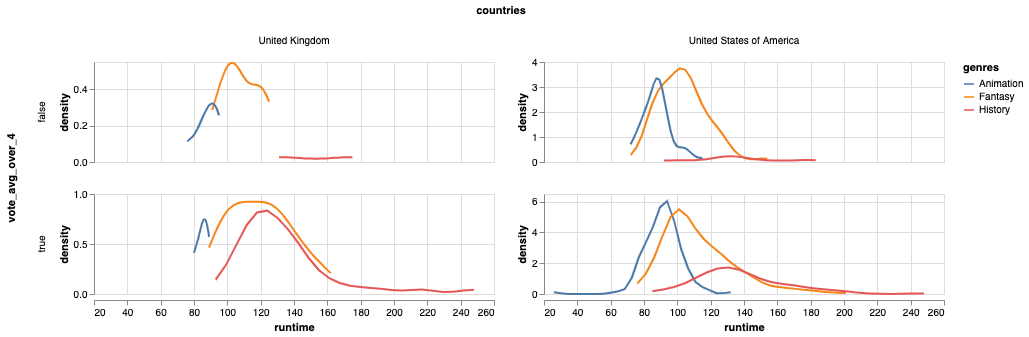

In [18]:
boom_both['vote_avg_over_4'] = boom_both['vote_average'] > 3
(alt.Chart(boom_both)
 .transform_density(
     'runtime',
     groupby=['genres', 'countries', 'vote_avg_over_4'],
     as_=['runtime', 'density'],
     counts=True)
 .mark_line().encode(
     x='runtime',
     y='density:Q',
     color='genres')
 .properties(height=100)
 .facet(column='countries', row='vote_avg_over_4')
 .resolve_scale(y='independent'))

When we use the line mark,
it simply stops where the density ends,
rather than continuing down to the x-axis line like an area mark.
This can make the plot hard to read,
so if we want to use a line for the density
it is more effective to use the area mark
with a stroke encoding
and an empty fill.

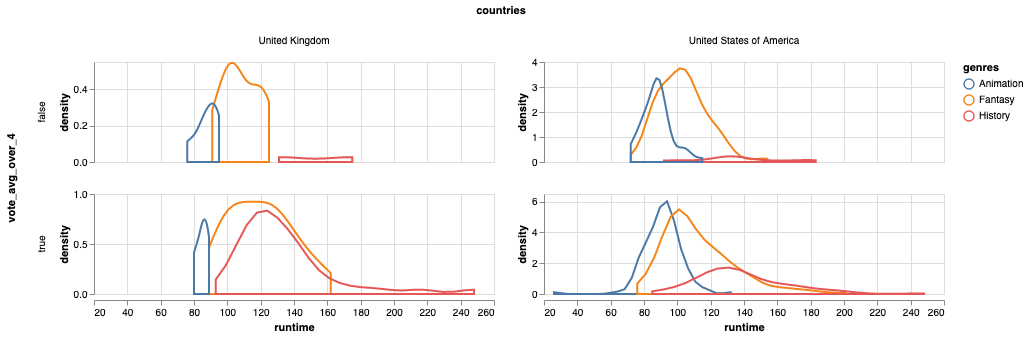

In [19]:
boom_both['vote_avg_over_4'] = boom_both['vote_average'] > 3
(alt.Chart(boom_both)
 .transform_density(
     'runtime',
     groupby=['genres', 'countries', 'vote_avg_over_4'],
     as_=['runtime', 'density'],
     counts=True)
 .mark_area(fill=None, strokeWidth=2).encode(
     x='runtime',
     y='density:Q',
     stroke='genres')
 .properties(height=100)
 .facet(column='countries', row='vote_avg_over_4')
 .resolve_scale(y='independent'))

### ggplot

In [20]:
%load_ext rpy2.ipython

In [21]:
%%R
library(rjson)
library(tidyverse)
movies <- fromJSON(file = 'data/lec2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(countries, genres))
    
head(movies)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 6 × 11
     id title runtime budget revenue genres countries vote_average vote_loved_it
  <dbl> <chr>   <dbl>  <dbl>   <dbl> <name> <named l>        <dbl>         <dbl>
1    12 Find…     100  9.4e7  9.40e8 <chr … <chr [1]>         3.86         0.322
2    22 Pira…     143  1.4e8  6.55e8 <chr … <chr [1]>         3.81         0.32 
3    35 The …      87  7.5e7  5.27e8 <chr … <chr [1]>         3.44         0.155
4    58 Pira…     151  2  e8  1.07e9 <chr … <chr [1]>         3.47         0.198
5    75 Mars…     106  7  e7  1.01e8 <chr … <chr [1]>         2.96         0.086
6   117 The …     119  2.5e7  7.63e7 <chr … <chr [1]>         3.88         0.268
# … with 2 more variables: vote_count <dbl>, vote_std <dbl>


Let's recall how to make a histogram.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



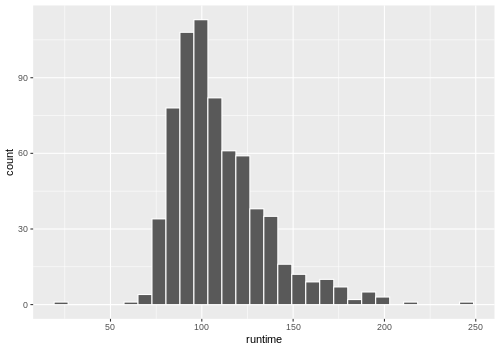

In [22]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_histogram(color = 'white')

In ggplot,
there is a specific `geom` for densities
which does both the KDE calculation and plots a line.

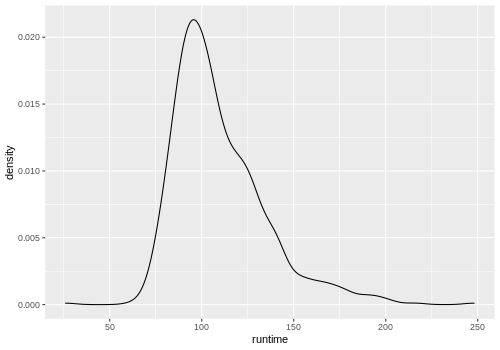

In [23]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density()

We can still control the parameters of the KDE calculation like in Altair,
for example the bandwidth,
how wide each kernel is
(similar to histogram bin width).

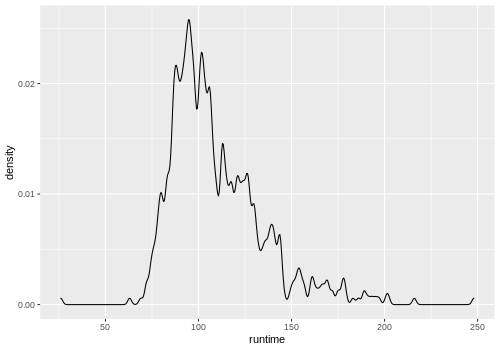

In [24]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(bw=1)

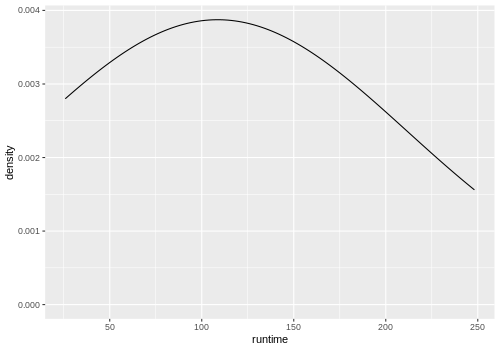

In [25]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(bw=100)

Filling the density can make it look a bit nicer.

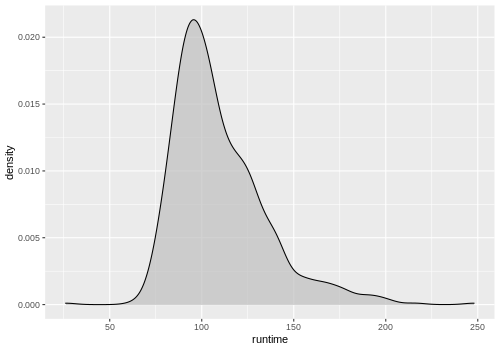

In [26]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(fill = 'grey', alpha = 0.7)

To color/fill by a variable,
we don't need a separate groupby,
but can treat `geom_density` like any other geom,
which is convenient.
In dplyr,
a list can be unpacked via the `unnest` function.

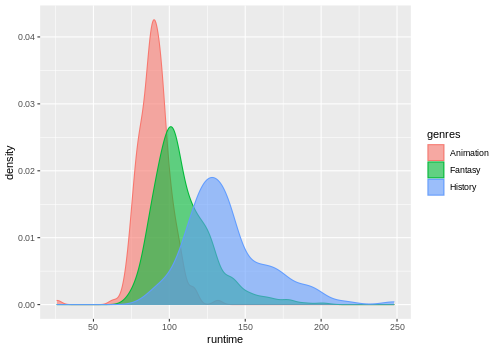

In [27]:
%%R -w 500 -h 350
free_genres <- movies %>% unnest(genres)
ggplot(free_genres) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6)

We need to unpack both `genres` and `countries`
if we want to use aesthetic mappings for both these columns.

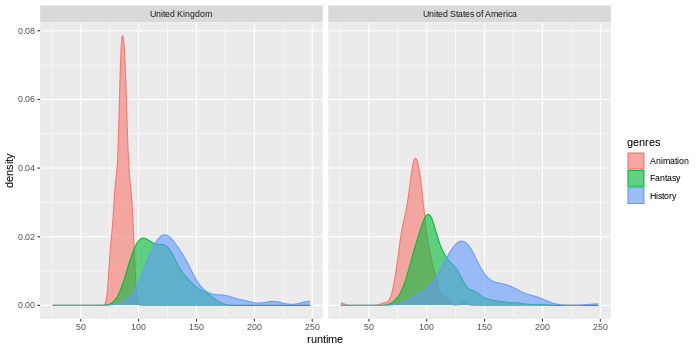

In [28]:
%%R -w 700 -h 350
free_both <- free_genres %>%
    unnest(countries)
ggplot(free_both) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6) +
    facet_wrap(~countries)

To map the rows and columns of the plot grid to variables in the data set,
we can use `facet_grid` instead of `facet_wrap`.

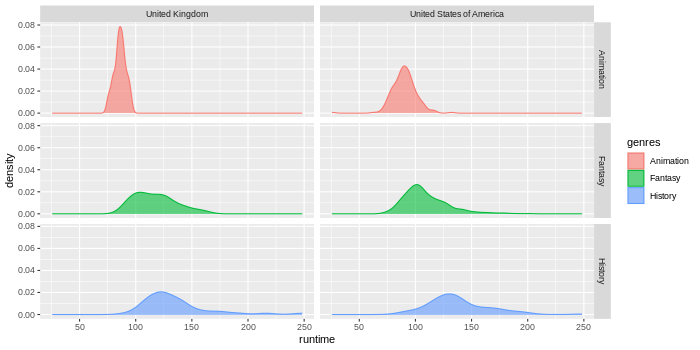

In [29]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6) +
    facet_grid(genres ~ countries)

## Comparing distributions for multiple categorical variables along the y-axis

### Altair

While it is possible to make [violin plots](https://altair-viz.github.io/gallery/violin_plot.html)
and [stripplots](https://altair-viz.github.io/gallery/stripplot.html) (categorical scatter plots) in Altair,
these do currently not work with a categorical x/y axies,
and we need to use faceting instead to display different categories,
which gives us less flexibility.
Therefore,
we will primarily use boxplots when comparing multiple distributions with Altair.

> Actually for the boxplots we don't need a separate color since the boxes have separate labels on the y-axis, but here just for the sake of being explicit and keeping the same coloring as above.

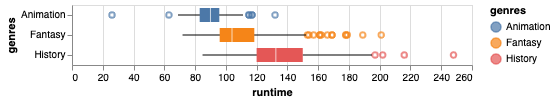

In [30]:
(alt.Chart(boom_genres)
 .mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres'))

Boxplots work well with faceting.

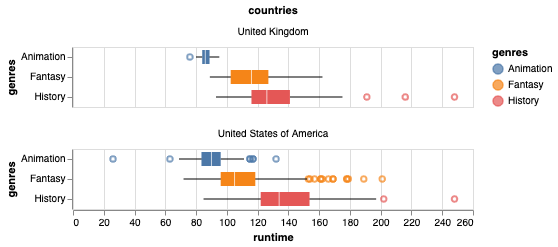

In [31]:
(alt.Chart(boom_both)
 .mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres')
 .facet('countries', columns=1))

The size of the boxes can be made proportional to the count of observations
in that group.
We could also have used barplot for this,
if we need a more precise indication of the counts.

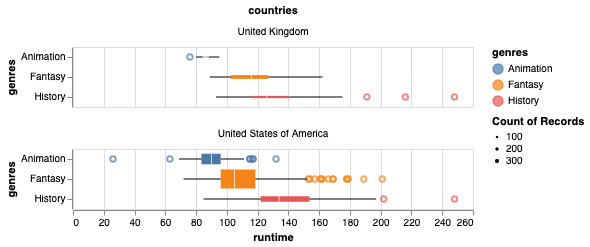

In [32]:
(alt.Chart(boom_both)
 .mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres',
     size='count()')
 .facet('countries', columns=1))

In general boxplots show 5-9 values
but this has shortcomings
as they hide important information,
such as multimodality and the number of observations.

Refer to [Autodesk Research](https://www.autodesk.com/research/publications/same-stats-different-graphs)
who made the animation of the datasaurus.

Violinplots are yet not possible in an easy way in Altair:

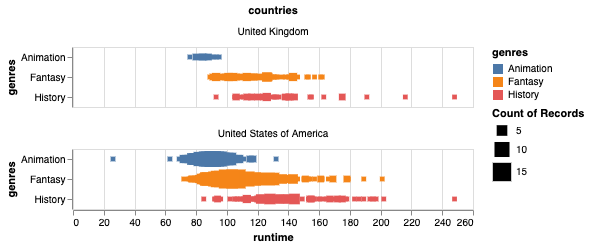

In [33]:
squareolins = (alt.Chart(boom_both)
 .mark_square().encode(
     x='runtime',
     y='genres',
     color='genres',
     size='count()'))
squareolins.facet('countries', columns=1)

We could add a mean dot.
Below I recreate the chart
since there is no good way to remove the size and color encodings
that we had in the chart above
(and we don't want to color or resize the means).
I could have done these plots in the opposite order 
and avoided having to code the entire chart twice,
just changing the mark and the necessary encoding.

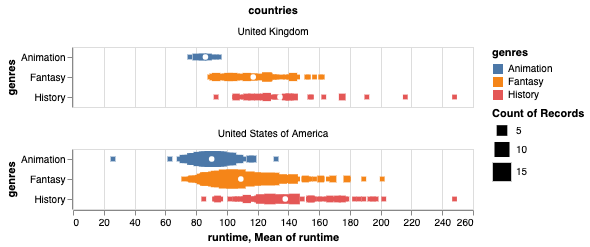

In [34]:
means = (
    alt.Chart(boom_both)
    .mark_circle(color='white').encode(
        x='mean(runtime)',
        y='genres'))
(squareolins + means).facet('countries', columns=1)

This is one thing I appreciate with Altair 
(and graphical grammars in general):
understanding how to compose plots from individual elements,
allows you some creativity in what you make
versus using a pre-made plot via a set name (stripplot, violinplot, etc).

Nevertheless, we should of course be very careful with this 
because the common plots exist for good reason,
they are statistically robust in many cases,
and common enough that they are easier for people to interpret
than our own creations in many cases.

## In ggplot

ggplot has a boxplot geom.

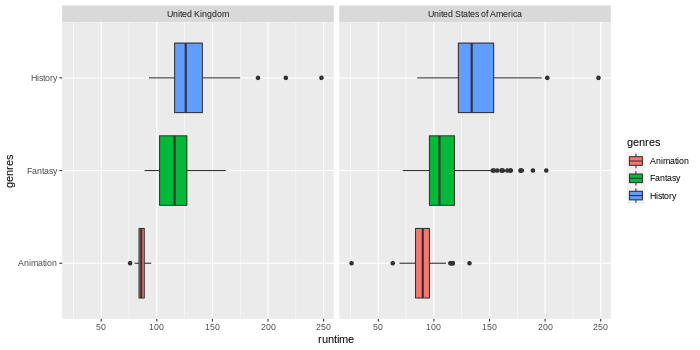

In [35]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_boxplot() +
    facet_wrap(~countries)

Which we can scale by the count of observations.

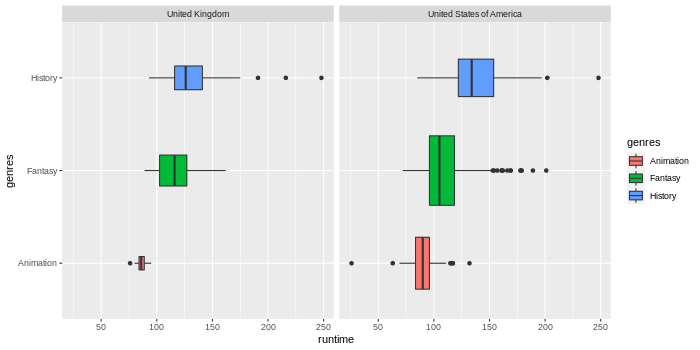

In [36]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_boxplot(varwidth = TRUE) +
    facet_wrap(~countries)

There is also a geom for creating violin plots
which both calculates the density and then plots
a line and an area.

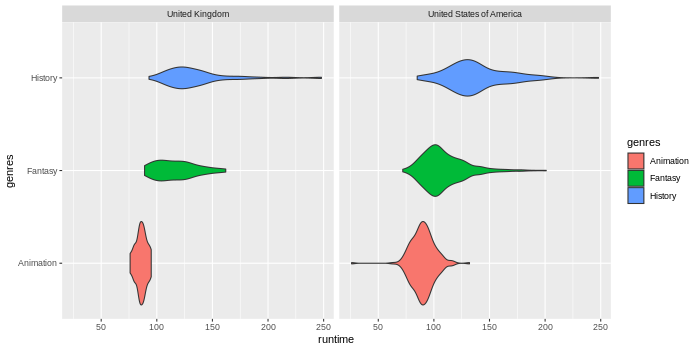

In [37]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin() +
    facet_wrap(~countries)

These can also be scaled by size.

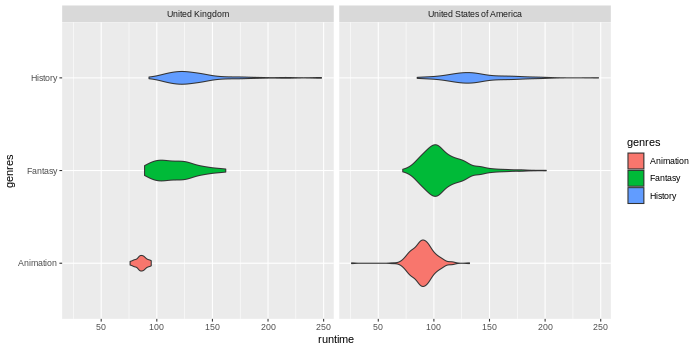

In [38]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin(scale = 'count') +
    facet_wrap(~countries)

We can combine geoms to add e.g. the median to the plot.

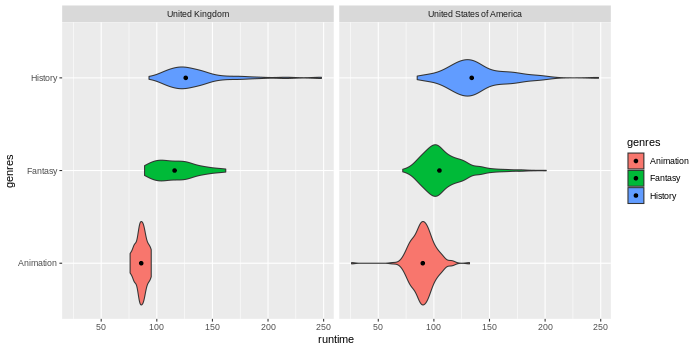

In [39]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median) +
    facet_wrap(~countries)

It is always a good idea to have a look at 
where the individual data points are.
For this we can use a categorical scatter plot
where the dots are spread/jittered randomly on the non-value axis
so that they don't all overlap via `geom_jitter`.

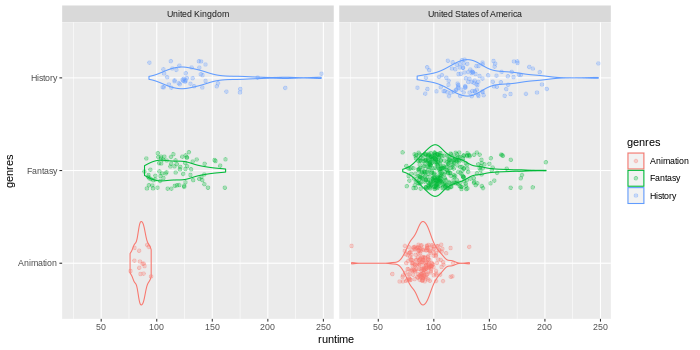

In [40]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        color = genres) +
    geom_jitter(height = 0.2, alpha = 0.3) +
    geom_violin(fill = NA) +
    facet_wrap(~countries)

ggplot understands that if you color by a variable,
it should create separate violins for each group on the same location
of the categorical axis.
In Altair,
this would be a bit more cumbersome since we would need to use different facets.

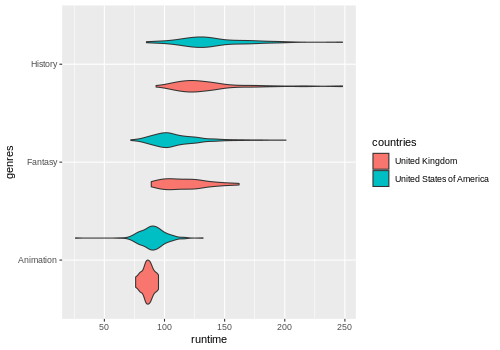

In [41]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin()

When adding median points,
we will see that they don't line up as expected by default.
While the violins are "dodging" each other,
the points are aligned in a row.

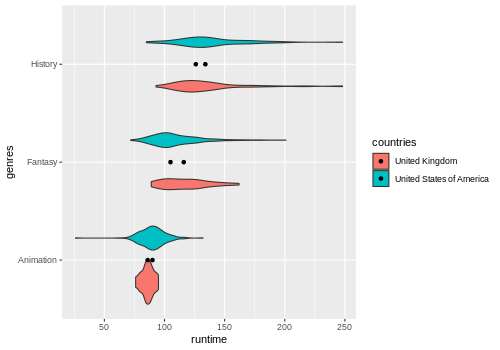

In [42]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median)

To add point in the right position for the median,
we need to use `position` parameter
to add the same dodge offset as for the violins.

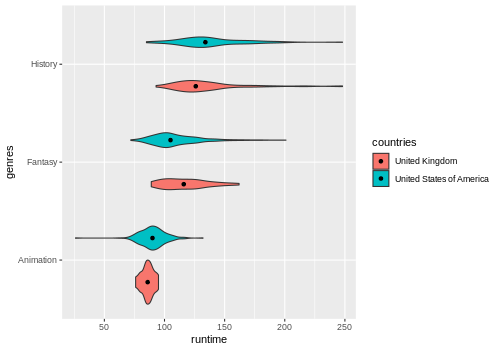

In [43]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median, position = position_dodge(0.9))
# 0.9 is the default offset for violins

You could also [use density lines in so called ridgeline plots to compare many distributions](https://www.r-graph-gallery.com/294-basic-ridgeline-plot.html).